Evaluate neuroverse3D on subtasks 


In [1]:
project_name = "camaret___in_context_segmentation"
import shutil
from pathlib import Path
from src.config import config

Loaded configuration for machine: nora


In [ ]:
# write demo file to the analysis folder and import to nora project

# file paths
origin_image_dir = Path('/software/notebooks/camaret/repos/Neuroverse3D/Demo_data/seg/imgs/')
origin_label_dir = Path('/software/notebooks/camaret/repos/Neuroverse3D/Demo_data/seg/labs/')

# Project settings
patient_id = "neuroverse3ddemo"

# Create import directory
import_dir = Path(config["RESULTS_DIR"]) / patient_id
import_dir.mkdir(exist_ok=True)
img_dir = import_dir / 'imgs'
lab_dir = import_dir / 'labs'
img_dir.mkdir(exist_ok=True)
lab_dir.mkdir(exist_ok=True)

# Copy and rename files
for case_num in ['001', '002', '003']:
    # Copy images
    src_img = origin_image_dir / f'{case_num}_T1_0000.nii.gz'
    dst_img = img_dir / f'{case_num}_img.nii.gz'
    if src_img.exists():
        shutil.copy2(src_img, dst_img)
        print(f"Copied: {src_img.name} -> {dst_img.name}")

    # Copy labels
    src_lab = origin_label_dir / f'{case_num}_T1.nii.gz'
    dst_lab = lab_dir / f'{case_num}_gt_all.nii.gz'
    if src_lab.exists():
        shutil.copy2(src_lab, dst_lab)
        print(f"Copied: {src_lab.name} -> {dst_lab.name}")
        
img_regex = r"(?P<patients_id>[^/]+)/imgs/(?P<studies_id>\d+)_img\.nii\.gz"
lab_regex = r"(?P<patients_id>[^/]+)/labs/(?P<studies_id>\d+)_gt_all\.nii\.gz"

!nora -p {project_name} --importfiles {img_dir} '{img_regex}'
!nora -p {project_name} --importfiles {lab_dir} '{lab_regex}' --addtag mask

Loaded configuration for machine: nora
Copied: 001_T1_0000.nii.gz -> 001_img.nii.gz
Copied: 001_T1.nii.gz -> 001_gt_all.nii.gz
Copied: 002_T1_0000.nii.gz -> 002_img.nii.gz
Copied: 002_T1.nii.gz -> 002_gt_all.nii.gz
Copied: 003_T1_0000.nii.gz -> 003_img.nii.gz
Copied: 003_T1.nii.gz -> 003_gt_all.nii.gz
searching in /nfs/data/nii/data1/Analysis/camaret___in_context_segmentation/ANALYSIS_20251122/results/neuroverse3ddemo/imgs with regexp (?P<patients_id>[^/]+)/imgs/(?P<studies_id>\d+)_img\.nii\.gz
importing neuroverse3ddemo#003 file:/nfs/data/nii/data1/camaret___in_context_segmentation/neuroverse3ddemo/003/003_img.nii.gz
importing neuroverse3ddemo#002 file:/nfs/data/nii/data1/camaret___in_context_segmentation/neuroverse3ddemo/002/002_img.nii.gz
importing neuroverse3ddemo#001 file:/nfs/data/nii/data1/camaret___in_context_segmentation/neuroverse3ddemo/001/001_img.nii.gz
Finished adding 3 files         
searching in /nfs/data/nii/data1/Analysis/camaret___in_context_segmentation/ANALYSIS_2025

In [32]:
# Or use the SegFM3D dataset

import os
import pandas as pd
import numpy as np
import nibabel as nib
from nilearn.image import resample_img

origin_image_dir = os.path.join(config["DATA_DIR"], "3D_val_npz")
origin_label_dir = os.path.join(config["DATA_DIR"], "3D_val_gt_interactive_seg")
current_dir = os.getcwd()
segfm3d_stats_bycase = pd.read_csv(os.path.join(current_dir, "ic_segmentation/notebooks/segfm3d_stats_bycase.csv"))
task_name =  "CT_LungLesions" #"MR_ProstateT2_NCI" #"MR_WMH_T1" #"CT_Aorta" # "CT_LungMask" #"MR_BraTS-T2f"  # "MR_BraTS-T2w"  # # "" # "MR_WMH_T1"  
case_name_list = segfm3d_stats_bycase[segfm3d_stats_bycase["CaseName"].str.startswith(task_name)]["CaseName"].tolist()
print(f"Found {len(case_name_list)} cases for task {task_name}.")

case_name_list = case_name_list[:10]  # Limit to first cases for demo
import_dir = Path(config["RESULTS_DIR"]) / task_name
import_dir.mkdir(exist_ok=True)

# Create output directories once before the loop
img_dir = import_dir / 'imgs'
lab_dir = import_dir / 'labs'
img_dir.mkdir(exist_ok=True)
lab_dir.mkdir(exist_ok=True)

Found 16 cases for task CT_LungLesions.


In [22]:
import ast

segfm3d_stats_bycase['nb_obj'] = segfm3d_stats_bycase['ours_object_shapes'].apply(
    lambda x: len(ast.literal_eval(x))
)
segfm3d_stats_bycase[segfm3d_stats_bycase["nb_obj"] == 1]["CaseName"].tolist()

['CT_AbdTumor_Adrenal_Ki67_Seg_003',
 'CT_AbdTumor_Adrenal_Ki67_Seg_004',
 'CT_AbdTumor_Adrenal_Ki67_Seg_018',
 'CT_AbdTumor_Adrenal_Ki67_Seg_025',
 'CT_AbdTumor_Adrenal_Ki67_Seg_030',
 'CT_AbdTumor_HCC_009',
 'CT_AbdTumor_HCC_039',
 'CT_AbdTumor_HCC_040',
 'CT_AbdTumor_HCC_086',
 'CT_AbdTumor_PETCT_1b199d094d',
 'CT_AbdTumor_PETCT_223f70f0b0',
 'CT_AbdTumor_PETCT_6d62e15c29',
 'CT_AbdTumor_PETCT_7ed037687a',
 'CT_AbdTumor_PETCT_bdd21f5590',
 'CT_AbdTumor_case_00004',
 'CT_AbdTumor_case_00007',
 'CT_AbdTumor_case_00039',
 'CT_AbdTumor_case_00048',
 'CT_AbdTumor_case_00071',
 'CT_AbdTumor_case_00108',
 'CT_AbdTumor_case_00132',
 'CT_AbdTumor_case_00162',
 'CT_AbdTumor_case_00175',
 'CT_AbdTumor_case_00208',
 'CT_AbdTumor_case_00209',
 'CT_AbdTumor_case_00239',
 'CT_AbdTumor_case_00245',
 'CT_AbdTumor_case_00251',
 'CT_AbdTumor_case_00295',
 'CT_AbdTumor_case_00406',
 'CT_AbdTumor_case_00415',
 'CT_AbdTumor_case_00443',
 'CT_AbdTumor_case_00445',
 'CT_AbdTumor_case_00460',
 'CT_AbdTumor_

In [33]:


for case_filename in case_name_list:
    print("Processing case: ", case_filename)
    case_num = case_filename[-5:]
    # remove underscores from case_num
    case_num = case_num.replace("_", "")
    print("Case number: ", case_num)

    # Use the original img_dir and gts_dir variables for loading
    img_path = os.path.join(origin_image_dir, case_filename + ".npz")
    img_data = np.load(img_path)
    img = img_data["imgs"]
    img_spacing = img_data["spacing"]
    img_spacing = img_spacing[::-1]  # reverse spacing order
    
    gt_path = os.path.join(origin_label_dir, case_filename + ".npz")
    gt_data = np.load(gt_path)
    gt = gt_data["gts"]
    gt_spacing = gt_data["spacing"]
    gt_spacing = gt_spacing[::-1]  # reverse spacing order
    
    print("Image shape: ", img.shape)
    print("GT shape: ", gt.shape)
    print(f"classes in GT : {np.unique(gt)}")

    img_nii = nib.Nifti1Image(img, affine=np.diag(np.append(img_spacing, 1)))
    gt_nii = nib.Nifti1Image(gt, affine=np.diag(np.append(gt_spacing, 1)))

    target_shape = (128, 128, 128)
    
    # Calculate zoom factors
    zoom_factors = np.array(img.shape) / np.array(target_shape)
    
    # New spacing = old spacing * zoom factors
    new_spacing = img_spacing * zoom_factors
    target_affine = np.diag(np.append(new_spacing, 1))
    
    resampled_img = resample_img(img_nii, 
                                 target_affine=target_affine, 
                                 target_shape=target_shape, 
                                 interpolation='continuous',
                                 force_resample=True)
    
    resampled_gt = resample_img(gt_nii, 
                                target_affine=target_affine, 
                                target_shape=target_shape, 
                                interpolation='nearest',
                                force_resample=True)

    # Save to output directories
    nib.save(resampled_img, os.path.join(img_dir, task_name + "_" + case_num + "_img.nii.gz"))
    nib.save(resampled_gt, os.path.join(lab_dir, task_name + "_" + case_num + "_gt_all.nii.gz"))

# Match everything up to the last underscore before the file suffix
# Match only the filename part (after last /)
img_regex = r"(?<patients_id>[^/_]+)_(?<studies_id>[^_]+)_img\.nii\.gz"
lab_regex = r"(?<patients_id>[^/_]+)_(?<studies_id>[^_]+)_gt_all\.nii\.gz"

!nora -p {project_name} --importfiles {img_dir} '{img_regex}'
!nora -p {project_name} --importfiles {lab_dir} '{lab_regex}' --addtag mask

Processing case:  CT_LungLesions_LUNG1-002
Case number:  1-002
Image shape:  (37, 512, 512)
GT shape:  (37, 512, 512)
classes in GT : [0 1 2 3]
Processing case:  CT_LungLesions_LUNG1-024
Case number:  1-024
Image shape:  (78, 512, 512)
GT shape:  (78, 512, 512)
classes in GT : [0 1 2 3 4 5]
Processing case:  CT_LungLesions_LUNG1-038
Case number:  1-038
Image shape:  (30, 512, 512)
GT shape:  (30, 512, 512)
classes in GT : [0 1 2]
Processing case:  CT_LungLesions_LUNG1-050
Case number:  1-050
Image shape:  (29, 512, 512)
GT shape:  (29, 512, 512)
classes in GT : [0 1 2]
Processing case:  CT_LungLesions_LUNG1-060
Case number:  1-060
Image shape:  (86, 512, 512)
GT shape:  (86, 512, 512)
classes in GT : [0 1 2 3 4]
Processing case:  CT_LungLesions_LUNG1-177
Case number:  1-177
Image shape:  (60, 512, 512)
GT shape:  (60, 512, 512)
classes in GT : [0 1]
Processing case:  CT_LungLesions_LUNG1-229
Case number:  1-229
Image shape:  (68, 512, 512)
GT shape:  (68, 512, 512)
classes in GT : [0 1

In [17]:
# Load model

import sys
sys.path.append("/software/notebooks/camaret/repos/Neuroverse3D")
from neuroverse3D.lightning_model import LightningModel
from utils.dataloading import *
from utils.task_synthesis import *
device = "cuda:0"
checkpoint_path = '/software/notebooks/camaret/repos/Neuroverse3D/checkpoint/neuroverse3D.ckpt'
checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
hparams = checkpoint['hyper_parameters']
# load model
import warnings
warnings.filterwarnings('ignore')
model = LightningModel.load_from_checkpoint(checkpoint_path, map_location=torch.device(device))
print('Load checkpoint from:', checkpoint_path)
total_params = sum(p.numel() for p in model.parameters())
print("Total number of parameters: ", total_params)

Load checkpoint from: /software/notebooks/camaret/repos/Neuroverse3D/checkpoint/neuroverse3D.ckpt
Total number of parameters:  70854913


In [34]:
# Load data
from utils.dataloading import *
from utils.task_synthesis import *
images, labels = load_seg_data(img_dir, lab_dir) # load data
size_check(images), size_check(labels) # check size

print('Shape of images:',images.shape, '\nShape of labels:',labels.shape)

target_in, context_in, target_out_raw, context_out_raw = structure_data(images, labels, index = 0, verbose = True)

Shape of images: (10, 1, 128, 128, 128) 
Shape of labels: (10, 1, 128, 128, 128)
Shape of target_in: (1, 1, 128, 128, 128) 
Shape of target_out: (1, 1, 128, 128, 128)
Shape of context_in: (1, 9, 1, 128, 128, 128) 
Shape of context_out: (1, 9, 1, 128, 128, 128)
The context size is: 9


Unique classes in the mask: [0. 1. 2. 3.]
Selected classes: range(1, 30)


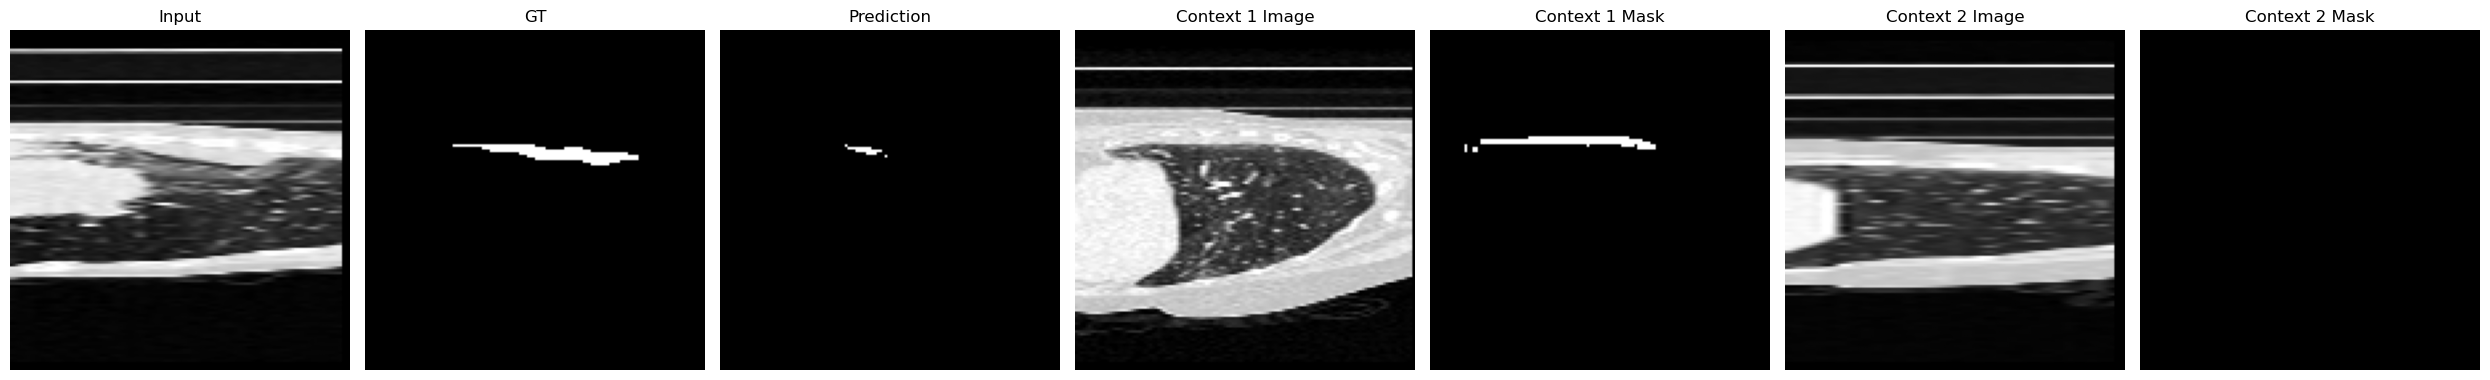

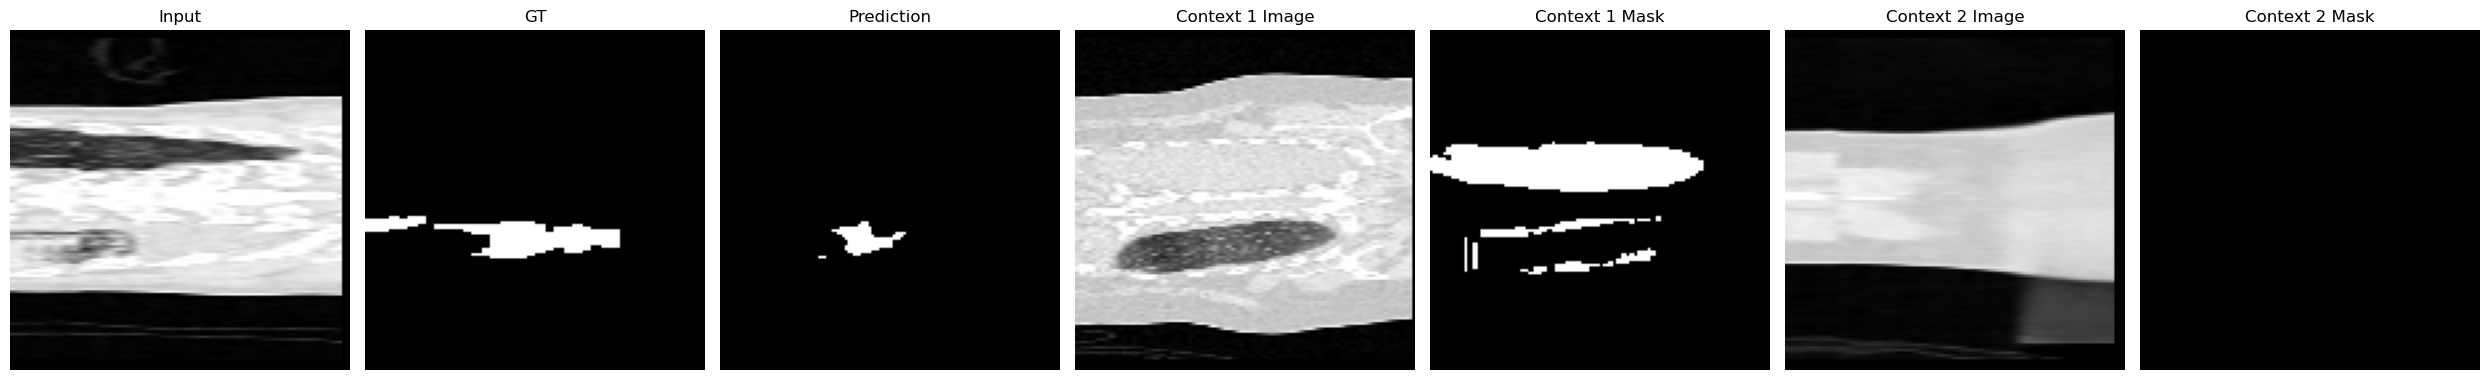

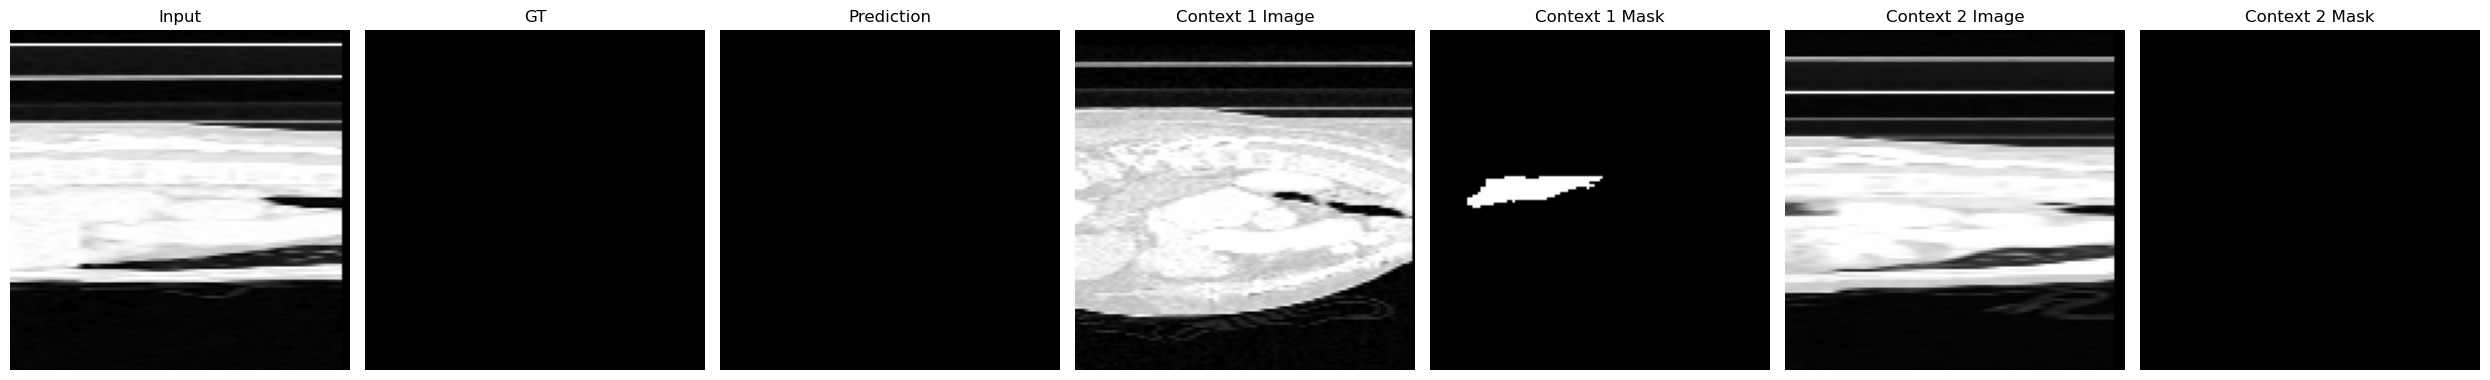

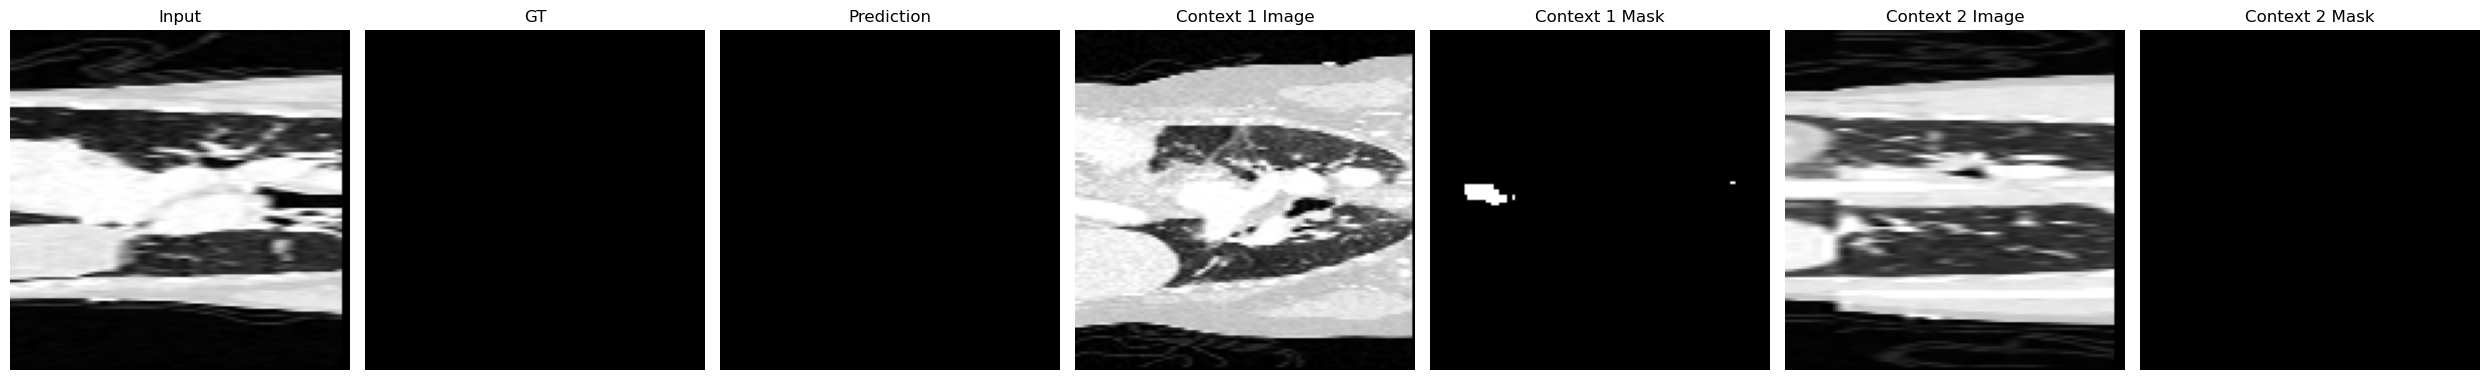

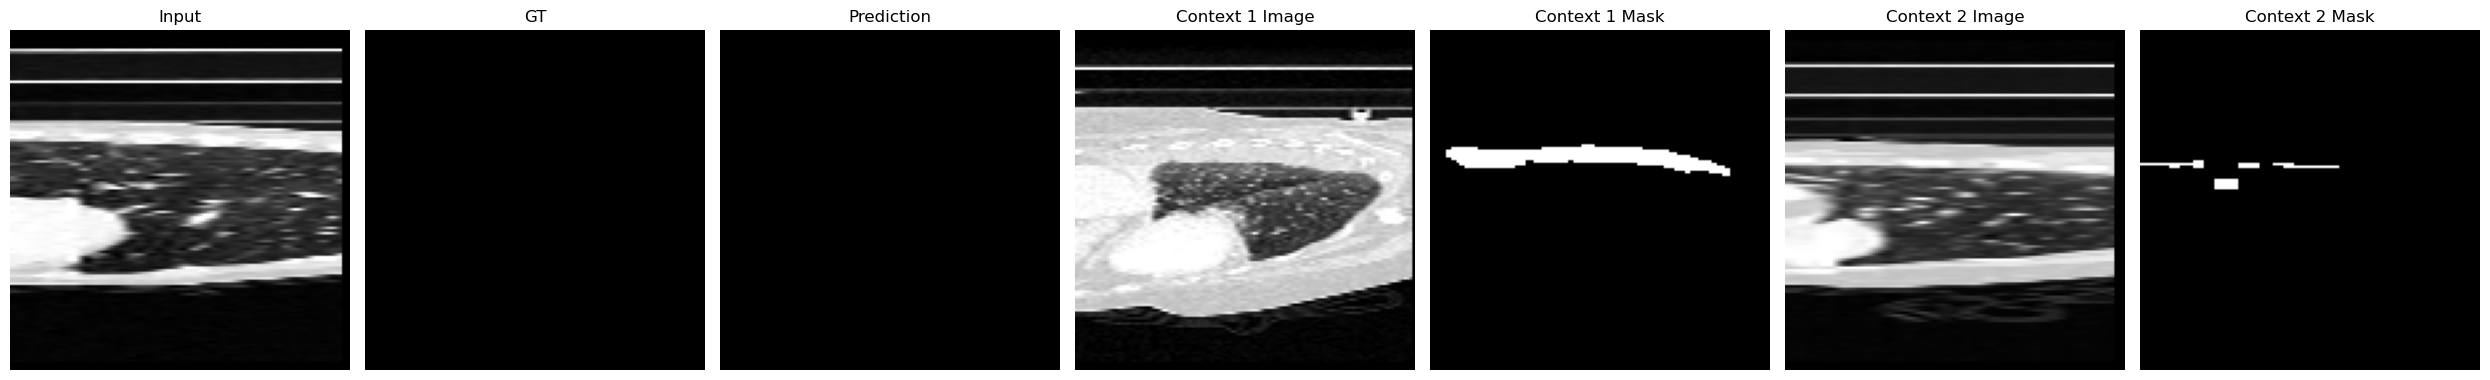

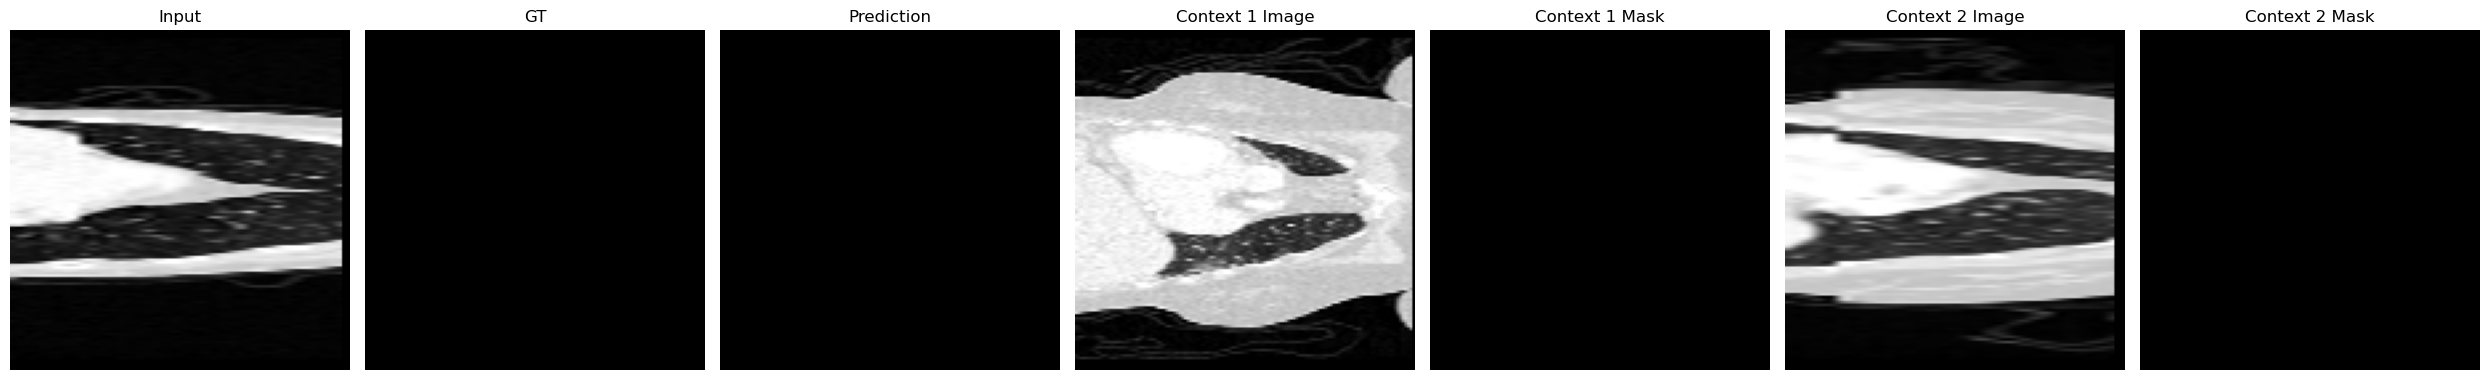

In [35]:
# Set random foreground
unique_masks = np.unique(target_out_raw) 
print('Unique classes in the mask:', unique_masks)

# Feel free to try different segmentation tasks. 
seg_class = range(1,30)
#seg_class = np.random.choice(unique_masks, size=3, replace=False) # randomly select 3 classes
print('Selected classes:',seg_class)

# Set the foreground class to 1
context_out = np.isin(context_out_raw, seg_class).astype(np.float32)
target_out = np.isin(target_out_raw, seg_class).astype(np.float32)

# Normalization
target_out = normalize_3d_volume(torch.tensor(target_out).to(device))
target_in = normalize_3d_volume(torch.tensor(target_in).to(device))
context_in = normalize_3d_volume(torch.tensor(context_in))
context_out = normalize_3d_volume(torch.tensor(context_out))

# Run model
with torch.no_grad():
    mask = model.forward(target_in, context_in, context_out, gs = 2) # gs control the size of mini-context

for slice_ in [44,64,84]:
    plot_pred(target_in, target_out, context_in, context_out, mask, slice_=slice_)
    plot_pred2(target_in, target_out, context_in, context_out, mask, slice_=slice_)

In [36]:
# Convert mask to numpy array if it's a torch tensor
mask_np = mask.cpu().detach().numpy() if hasattr(mask, 'cpu') else mask
# Remove batch dimension 
mask_np = mask_np[0,0]
print(mask_np.shape)
print(np.min(mask_np), np.max(mask_np))
# Threshold: values > 0.5 become 1, else 0
mask_np = (mask_np > 0.5).astype(np.int8)
print(np.unique(mask_np, return_counts=True))

target_out_np = target_out.cpu().detach().numpy()
target_out_np = target_out_np[0,0]
print(target_out_np.shape)
print(np.unique(target_out_np, return_counts=True))
target_out_np = (target_out_np > 0.5).astype(np.int8)
print(np.unique(target_out_np, return_counts=True))

# compute dsc and nsd
sys.path.append("/nfs/norasys/notebooks/camaret/cvpr25/CVPR-MedSegFMCompetition")
from unittest import case
from SurfaceDice import (
    compute_surface_distances,
    compute_surface_dice_at_tolerance,
    compute_dice_coefficient,
)
dsc = compute_dice_coefficient(mask_np, target_out_np)



# Load reference image to get affine
# get first file of img_dir
first_case_filename = sorted(list(img_dir.glob("*_img.nii.gz")))[0].name
ref_nii = nib.load(img_dir / first_case_filename)
affine = ref_nii.affine
surface_distance = compute_surface_distances(mask_np, target_out_np, spacing_mm=np.diag(affine)[:3])
nsd = compute_surface_dice_at_tolerance(surface_distance, tolerance_mm=2.0)
print(f'Dice Similarity Coefficient (DSC): {dsc:.4f}')
print(f'Normalized Surface Dice (NSD): {nsd:.4f}')

(128, 128, 128)
-0.0182174 0.6339995
(array([0, 1], dtype=int8), array([2096484,     668]))
(128, 128, 128)
(array([0., 1.], dtype=float32), array([2088723,    8429]))
(array([0, 1], dtype=int8), array([2088723,    8429]))
Dice Similarity Coefficient (DSC): 0.1282
Normalized Surface Dice (NSD): 0.1843


In [37]:
# write mask to nifti 

# Create NIfTI image with reference affine
mask_nii = nib.Nifti1Image(mask_np, affine=affine)
gt_nii = nib.Nifti1Image(target_out_np, affine=affine)

# Save to file
first_case_name = first_case_filename.split(".")[0].split("_img")[0]
lab_pred_dir = import_dir / 'labs_pred'
lab_pred_dir.mkdir(exist_ok=True)
nib.save(mask_nii, lab_pred_dir / f'{first_case_name}_pred.nii.gz')
nib.save(gt_nii, lab_pred_dir / f'{first_case_name}_gt.nii.gz')

# save to nora project 
# Match everything up to the last underscore before the file suffix
# Match only the filename part (after last /)
lab_regex = r"(?<patients_id>[^/_]+)_(?<studies_id>[^_]+)_pred\.nii\.gz"
!nora -p {project_name} --importfiles {lab_pred_dir} '{lab_regex}' --addtag mask
lab_regex = r"(?<patients_id>[^/_]+)_(?<studies_id>[^_]+)_gt\.nii\.gz"

!nora -p {project_name} --importfiles {lab_pred_dir} '{lab_regex}' --addtag mask

searching in /nfs/data/nii/data1/Analysis/camaret___in_context_segmentation/ANALYSIS_20251122/results/CT_LungLesions/labs_pred with regexp (?<patients_id>[^/_]+)_(?<studies_id>[^_]+)_pred\.nii\.gz
importing LungLesions#1-002 file:/nfs/data/nii/data1/camaret___in_context_segmentation/LungLesions/1-002/CT_LungLesions_1-002_pred.nii.gz
Finished adding 1 files         
searching in /nfs/data/nii/data1/Analysis/camaret___in_context_segmentation/ANALYSIS_20251122/results/CT_LungLesions/labs_pred with regexp (?<patients_id>[^/_]+)_(?<studies_id>[^_]+)_gt\.nii\.gz
importing LungLesions#1-002 file:/nfs/data/nii/data1/camaret___in_context_segmentation/LungLesions/1-002/CT_LungLesions_1-002_gt.nii.gz
Finished adding 1 files         


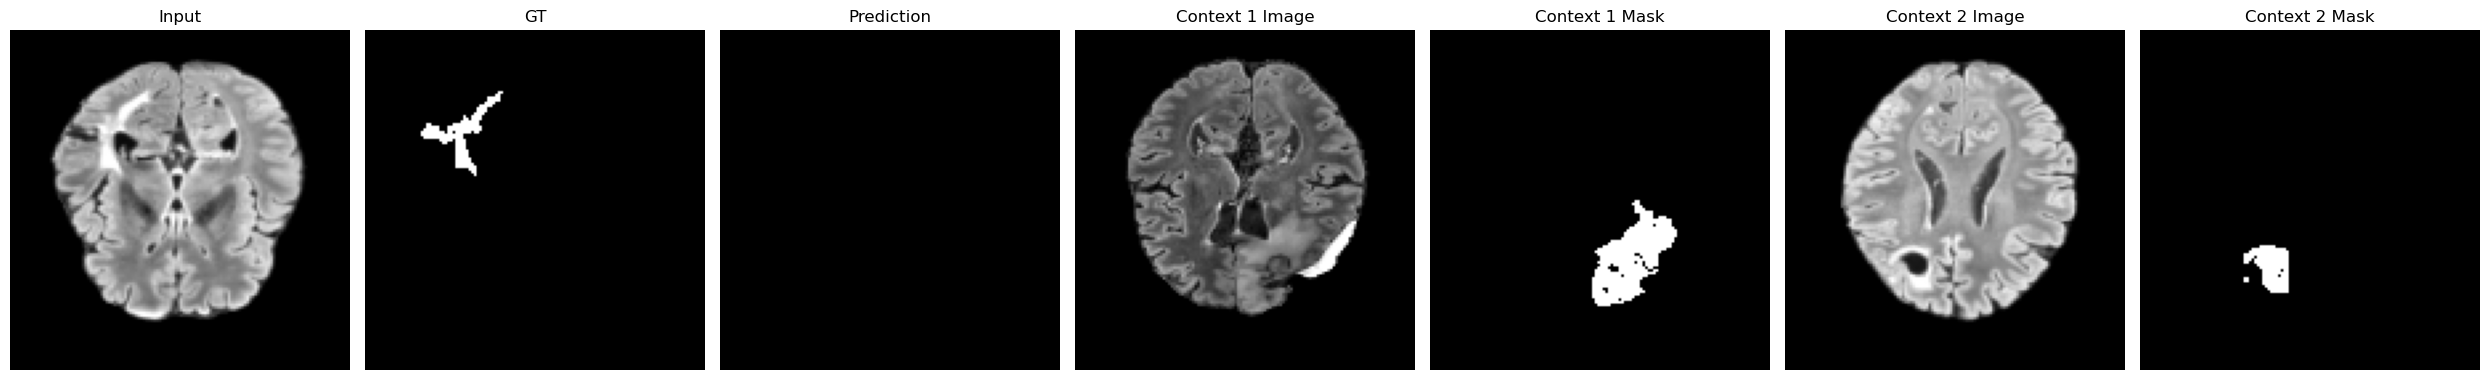

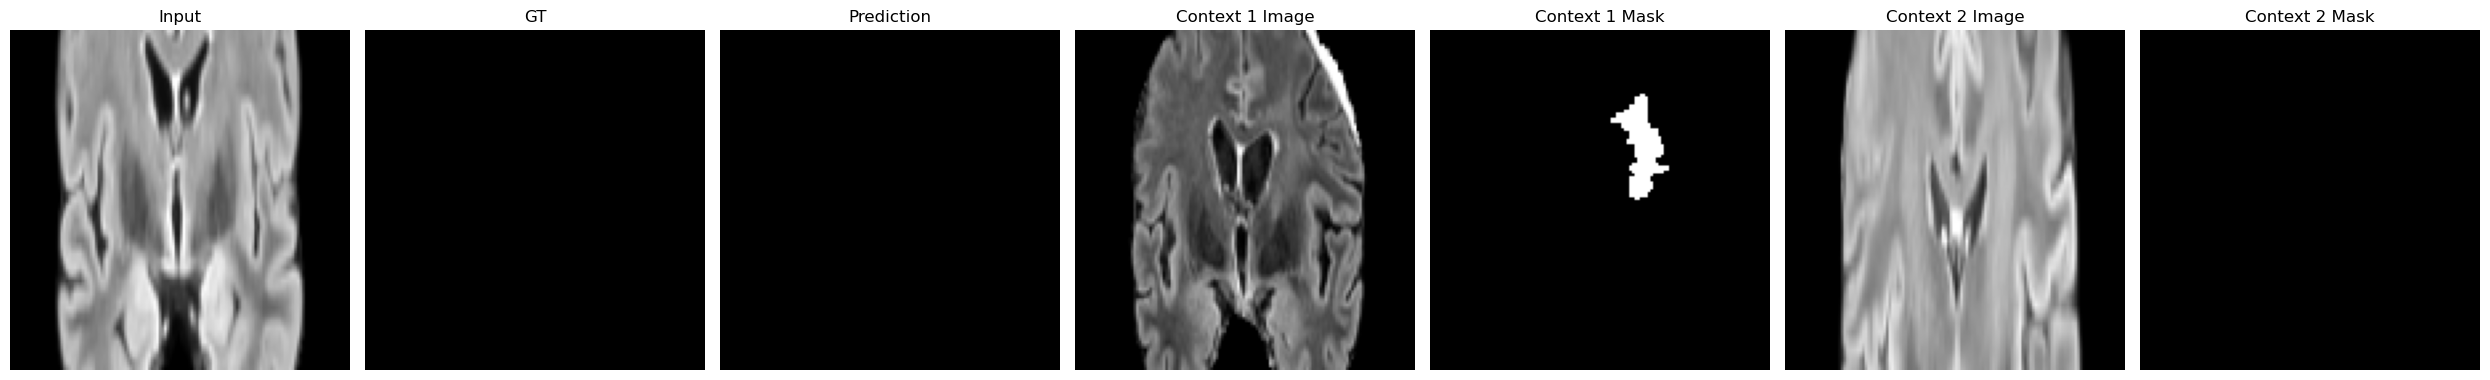

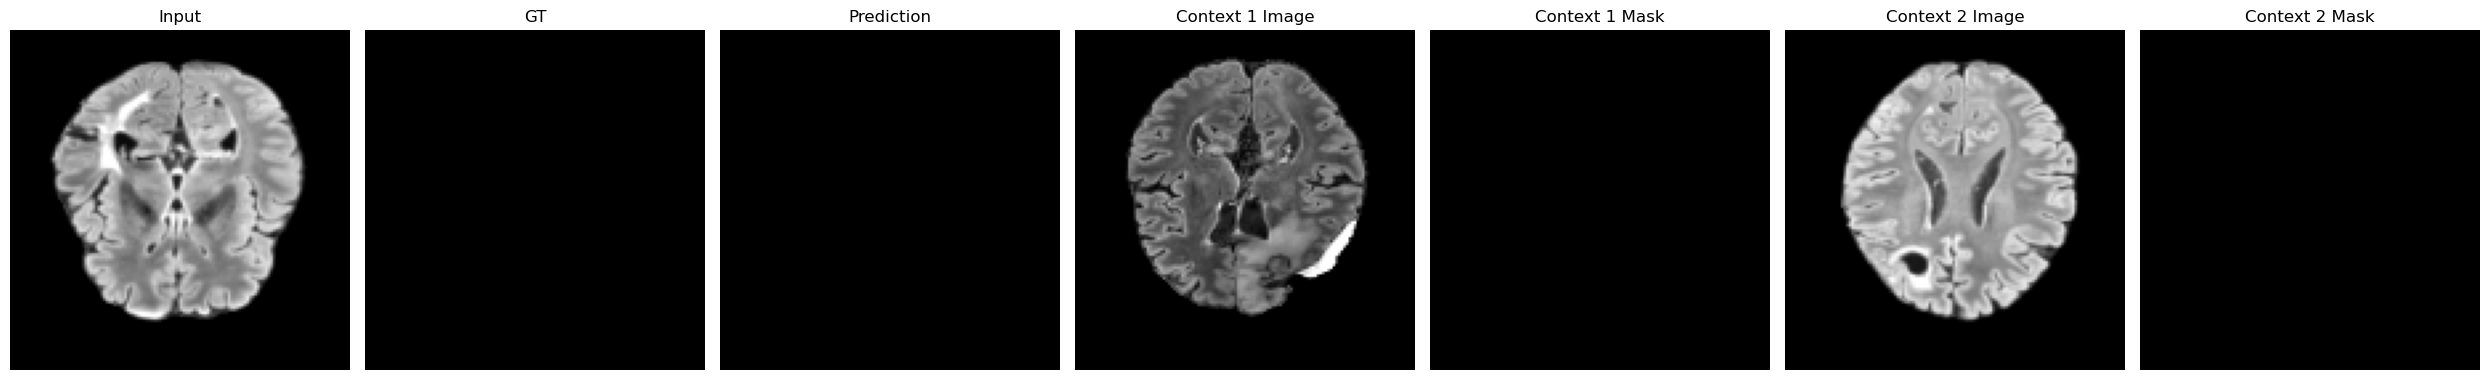

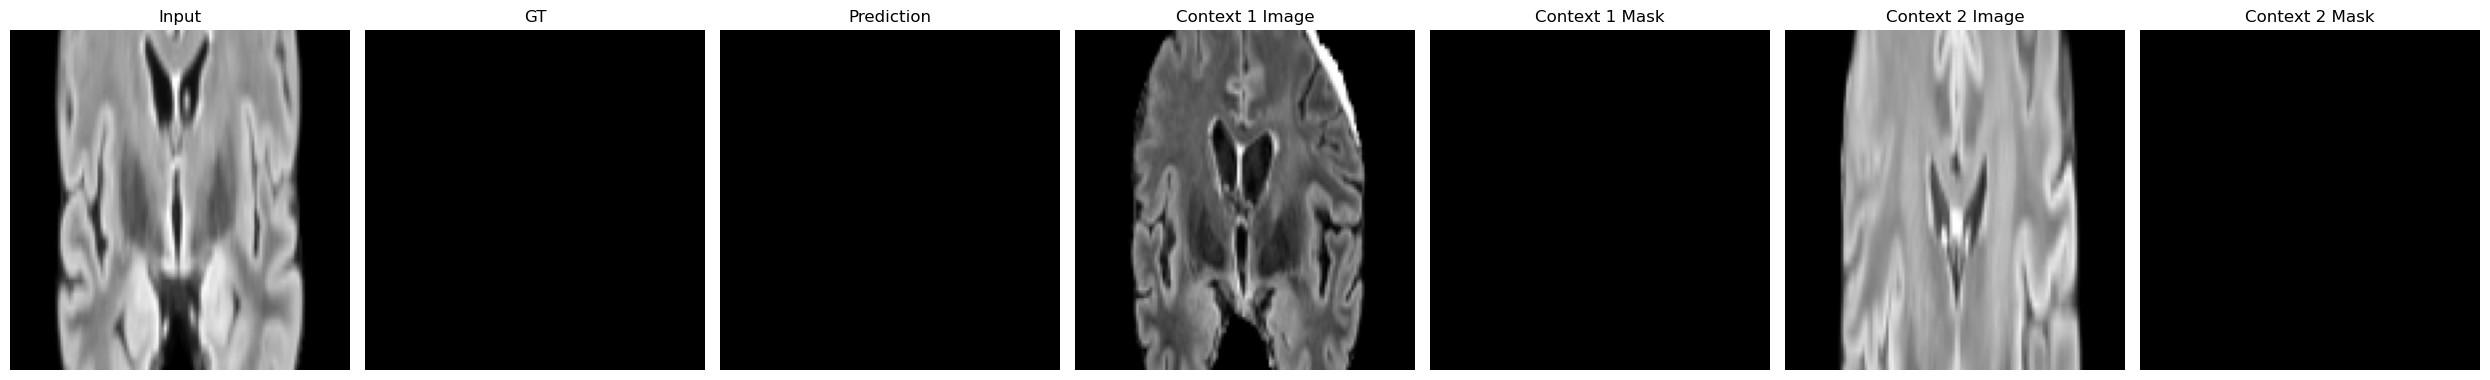

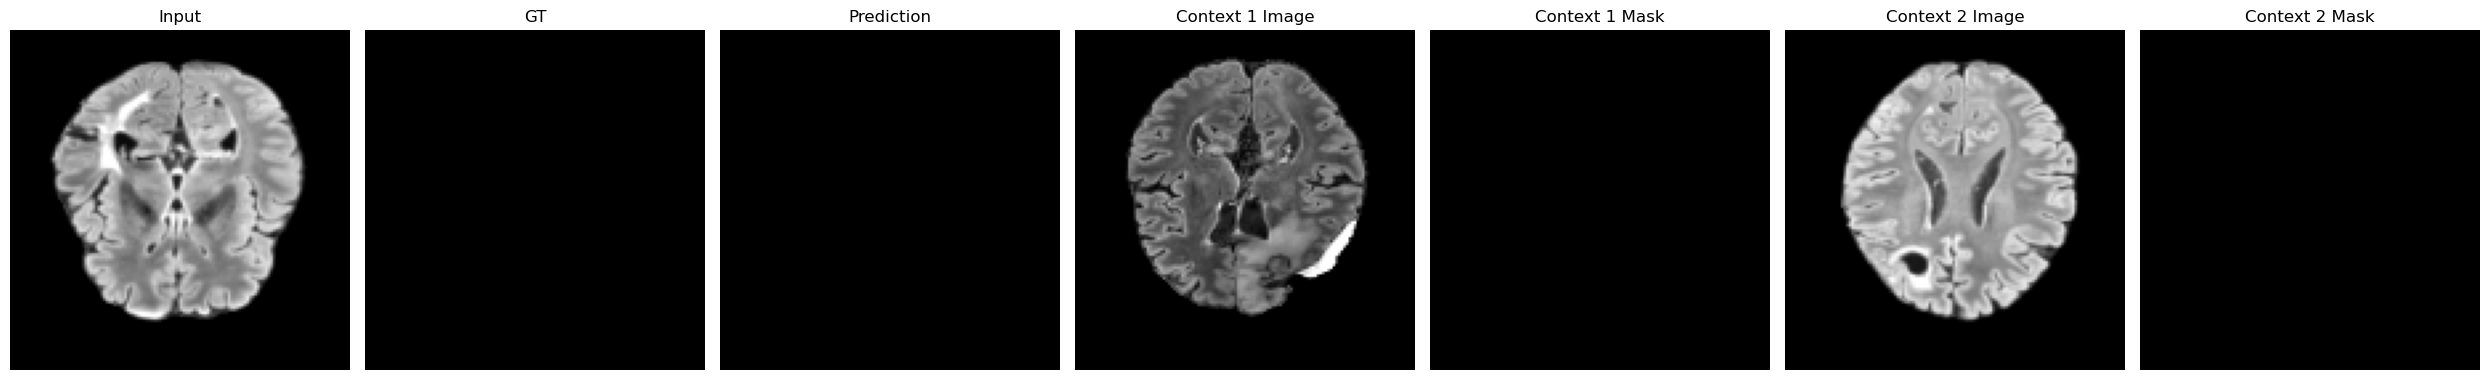

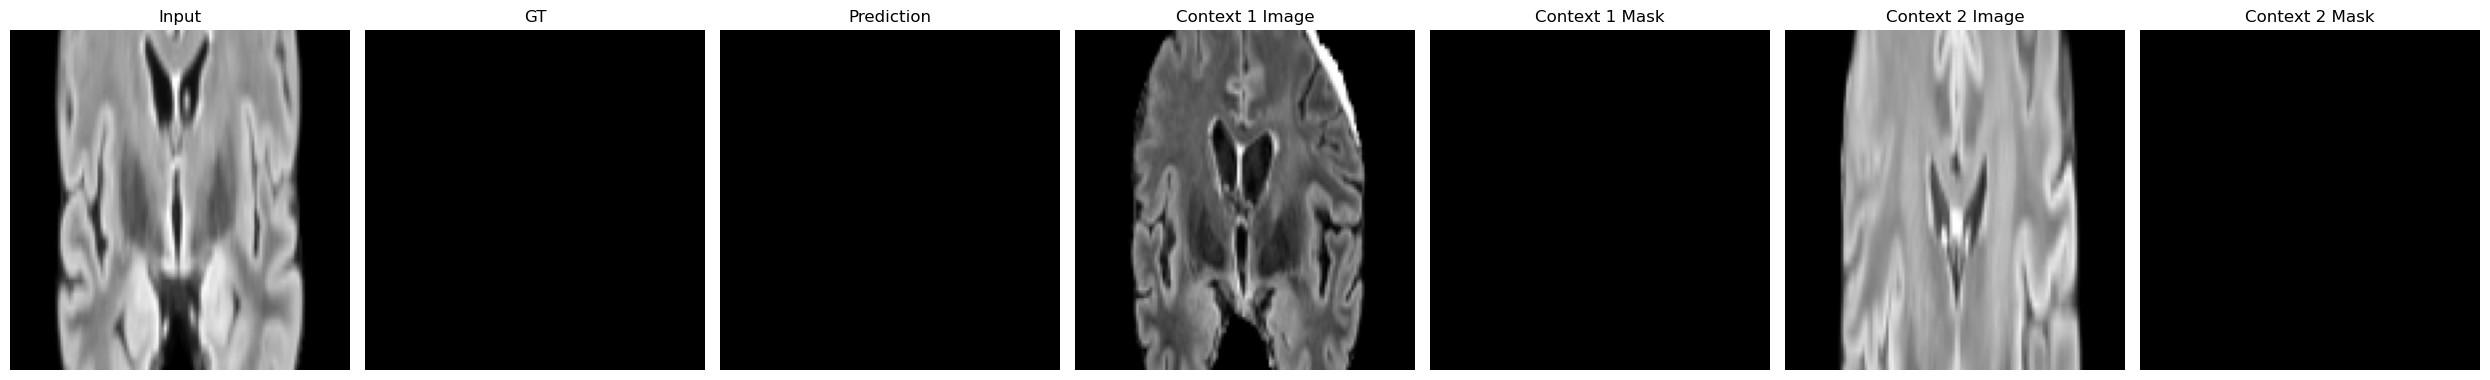

In [27]:
# Evaluation 
for seg_class in [[1,20],[2,21],[7,26]]: # Select foreground class. 
    # Set the foreground class to 1
    context_out = np.isin(context_out_raw, seg_class).astype(np.float32)
    target_out = np.isin(target_out_raw, seg_class).astype(np.float32)

    # Normalization
    target_out = normalize_3d_volume(torch.tensor(target_out).to(device))
    target_in = normalize_3d_volume(torch.tensor(target_in).to(device))
    context_in = normalize_3d_volume(torch.tensor(context_in)) # It is important to keep context in cpu to save memory, when the context size is large.
    context_out = normalize_3d_volume(torch.tensor(context_out))
    
    
    # Run model
    with torch.no_grad():
        mask = model.forward(target_in, context_in, context_out, gs = 2) # gs control the size of mini-context
        
    plot_pred(target_in, target_out, context_in, context_out, mask, slice_=64)
    plot_pred2(target_in, target_out, context_in, context_out, mask, slice_=64)

In [ ]:
# Plotting




import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# plot cases 
for case_num in case_numbers:
    img_file = [f for f in img_cases if case_num in f][0]
    gt_file = [f for f in gt_cases if case_num in f][0]

    img_nii = nib.load(os.path.join(cases_dir, img_file))
    gt_nii = nib.load(os.path.join(cases_dir, gt_file))

    img_data = img_nii.get_fdata()
    gt_data = gt_nii.get_fdata()

    print(f"Case {case_num}: Image shape: {img_data.shape}, GT shape: {gt_data.shape}")
    print(f"classes in GT: {np.unique(gt_data)}")

    # transpose to (H, W, D)
    img_data = np.transpose(img_data, (2, 1, 0))
    gt_data = np.transpose(gt_data, (2, 1, 0))

    # Plot z-middle slice of image and ground truth
    mid_slice = img_data.shape[2] // 2
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(img_data[:, :, mid_slice], cmap='gray')
    plt.title(f'Case {case_num} - Image Middle Slice')
    plt.subplot(1, 2, 2)
    plt.imshow(gt_data[:, :, mid_slice], cmap='gray')
    plt.title(f'Case {case_num} - Ground Truth Middle Slice')
    plt.show()  
    
    # Plot y-middle slice of image and ground truth
    mid_slice_y = img_data.shape[1] // 2
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(img_data[:, mid_slice_y, :], cmap='gray')
    plt.title(f'Case {case_num} - Image Y-Middle Slice')
    plt.subplot(1, 2, 2)
    plt.imshow(gt_data[:, mid_slice_y, :], cmap='gray')
    plt.title(f'Case {case_num} - Ground Truth Y-Middle Slice')
    plt.show()

    # Plot x-middle slice of image and ground truth
    mid_slice_x = img_data.shape[0] // 2
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(img_data[mid_slice_x, :, :], cmap='gray')
    plt.title(f'Case {case_num} - Image X-Middle Slice')
    plt.subplot(1, 2, 2)
    plt.imshow(gt_data[mid_slice_x, :, :], cmap='gray')
    plt.title(f'Case {case_num} - Ground Truth X-Middle Slice')
    plt.show()

# resize to 128x128x128 and store in arrays

from scipy.ndimage import zoom

case_numbers = ['0006', '0009', '0070']

# Initialize arrays
images = np.zeros((3, 1, 128, 128, 128), dtype=np.float32)
labels = np.zeros((3, 1, 128, 128, 128), dtype=np.float32)

# Load and resize each case
for idx, case_num in enumerate(case_numbers):
    # Find matching files
    img_file = [f for f in img_cases if case_num in f][0]
    gt_file = [f for f in gt_cases if case_num in f][0]
    
    # Load nifti files
    img_nii = nib.load(os.path.join(cases_dir, img_file))
    gt_nii = nib.load(os.path.join(cases_dir, gt_file))
    
    img_data = img_nii.get_fdata()
    gt_data = gt_nii.get_fdata()

    img_data = np.transpose(img_data, (2, 1, 0))
    gt_data = np.transpose(gt_data, (2, 1, 0))

    # set all classes >1 to 1 in gt_data
    gt_data[gt_data > 1] = 1

    print(f"classes in GT after thresholding: {np.unique(gt_data)}")

    # Plot a middle slice for verification
    mid_slice = img_data.shape[2] // 2
    plt.imshow(img_data[:, :, mid_slice], cmap='gray')
    plt.title(f'Case {case_num} - Middle Slice')
    plt.show()
    
    # Calculate zoom factors
    zoom_factors = [128 / s for s in img_data.shape]
    
    # Resize to (128, 128, 128)
    img_resized = zoom(img_data, zoom_factors, order=1)
    gt_resized = zoom(gt_data, zoom_factors, order=0)

    # plot resized middle slice for verification
    mid_slice_resized = img_resized.shape[2] // 2
    plt.imshow(img_resized[:, :, mid_slice_resized], cmap='gray')
    plt.title(f'Case {case_num} - Resized Middle Slice')
    plt.show()
    
    # Store in arrays
    images[idx, 0] = img_resized
    labels[idx, 0] = gt_resized

print('Shape of images:', images.shape)
print('Shape of labels:', labels.shape)



Case numbers: ['0006', '0009', '0070', '0107', '0321', '0546', '0703', '0771', '1033', '1096', '1172', '1262']

Images (12): ['MR_BraTS-T2f_bratsgli_0006_img.nii.gz', 'MR_BraTS-T2f_bratsgli_1262_img.nii.gz', 'MR_BraTS-T2f_bratsgli_0703_img.nii.gz', 'MR_BraTS-T2f_bratsgli_0070_img.nii.gz', 'MR_BraTS-T2w_bratsgli_0771_img.nii.gz', 'MR_BraTS-T2f_bratsgli_1033_img.nii.gz', 'MR_BraTS-T2f_bratsgli_0546_img.nii.gz', 'MR_BraTS-T2f_bratsgli_0009_img.nii.gz', 'MR_BraTS-T2f_bratsgli_1096_img.nii.gz', 'MR_BraTS-T2w_bratsgli_0321_img.nii.gz', 'MR_BraTS-T2f_bratsgli_1172_img.nii.gz', 'MR_BraTS-T2f_bratsgli_0107_img.nii.gz']

Ground truths (12): ['MR_BraTS-T2f_bratsgli_0546_gt.nii.gz', 'MR_BraTS-T2f_bratsgli_0070_gt.nii.gz', 'MR_BraTS-T2f_bratsgli_0006_gt.nii.gz', 'MR_BraTS-T2f_bratsgli_1096_gt.nii.gz', 'MR_BraTS-T2w_bratsgli_0321_gt.nii.gz', 'MR_BraTS-T2w_bratsgli_0771_gt.nii.gz', 'MR_BraTS-T2f_bratsgli_0009_gt.nii.gz', 'MR_BraTS-T2f_bratsgli_0703_gt.nii.gz', 'MR_BraTS-T2f_bratsgli_1033_gt.nii.gz', 